# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [2]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [4]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [8]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')
df = pd.read_html('https://static.bc-edx.com/data/web/mars_facts/temperature.html')
df

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [9]:
# Extract all rows of data
rows = soup.find_all('tr')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [10]:
# Create an empty list
row_data = []

# Loop through the scraped data to create a list of rows
for row in rows:
    # Extract text from each cell in the row
    data = [td.get_text(strip=True) for td in row.find_all('td')]
    
    # Only append non-empty rows
    if data:
        row_data.append(data)

In [11]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
row_df = pd.DataFrame(row_data, columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])

In [12]:
# Confirm DataFrame was created successfully
row_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [13]:
# Examine data type of each column
row_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [14]:
# Change data types for data analysis
row_df['terrestrial_date'] = pd.to_datetime(row_df['terrestrial_date'])
row_df['sol'] = row_df['sol'].astype(int)
row_df['ls'] = row_df['ls'].astype(int)
row_df['month'] = row_df['month'].astype(int)
row_df['min_temp'] = row_df['min_temp'].astype(float)
row_df['pressure'] = row_df['pressure'].astype(float)

In [15]:
# Confirm type changes were successful by examining data types again
row_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [16]:
# 1. How many months are there on Mars?
months = row_df['month'].nunique()
months

12

In [17]:
# 2. How many sols (Martian days) worth of data are there?
sols_data = row_df['sol'].nunique()
sols_data


1867

In [18]:
# 3. What is the average minimum temperature by month?
month_min_temp = row_df.groupby('month')['min_temp'].mean()
month_min_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

Text(0, 0.5, 'Temperature in Celsius')

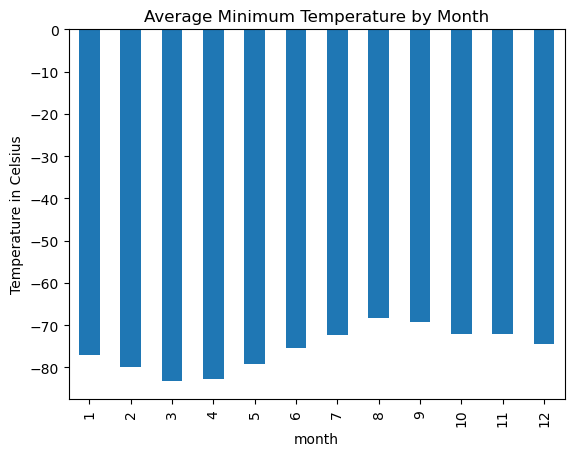

In [19]:
# Plot the average minimum temperature by month
avg_min_temp_month = month_min_temp.plot(kind='bar')
plt.title('Average Minimum Temperature by Month')
plt.xlabel('month')
plt.ylabel('Temperature in Celsius')



Text(0, 0.5, 'Temperature in Celsius')

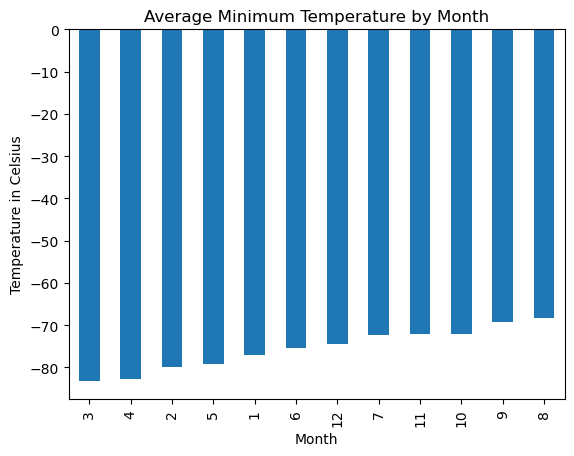

In [20]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
sorted_month_min_temp = month_min_temp.sort_values()

# Plot the sorted data
sorted_month_min_temp.plot(kind='bar')
plt.title('Average Minimum Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')

In [21]:
# 4. What is the average pressure by month?
avg_pressure_month = row_df.groupby('month')['pressure'].mean()
avg_pressure_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

Text(0, 0.5, 'Atmospheric Pressure')

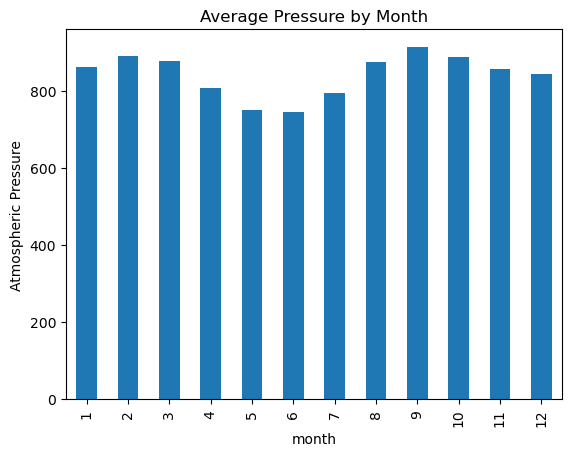

In [22]:
# Plot the average pressure by month
avg_pressure_month.plot(kind='bar')
plt.title('Average Pressure by Month')
plt.xlabel('month')
plt.ylabel('Atmospheric Pressure')

Text(0, 0.5, 'Atmospheric Pressure')

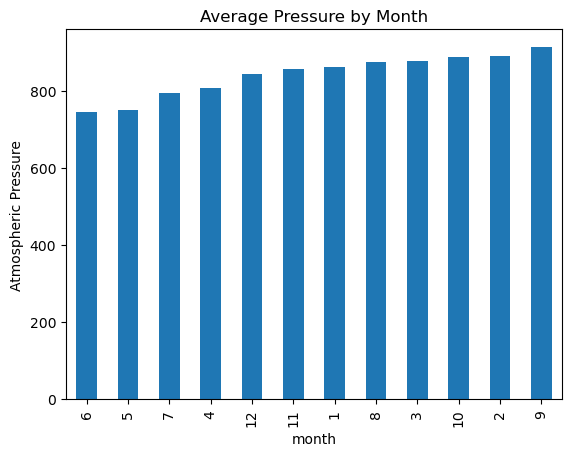

In [23]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
avg_pressure_month_sorted = avg_pressure_month.sort_values()

# Plot the sorted data
avg_pressure_month_sorted.plot(kind='bar')
plt.title('Average Pressure by Month')
plt.xlabel('month')
plt.ylabel('Atmospheric Pressure')

Text(0, 0.5, 'Minimum Temperature')

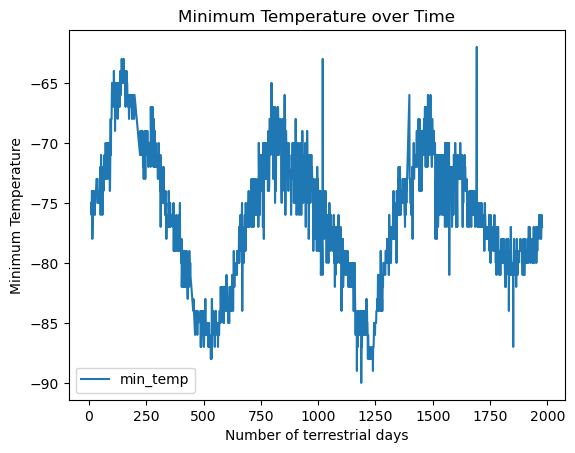

In [24]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set
row_df.plot(x='sol', y='min_temp')
plt.title('Minimum Temperature over Time')
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum Temperature')

In [28]:
import numpy as np
from scipy.fft import fft

# Make a list of the values for each column
days = row_df['terrestrial_date'].values
temp = row_df['min_temp'].values

# Perform FFT
fft_result = fft(temp)
frequencies = np.fft.fftfreq(len(days), d=1)  # Assuming 1 sol between each measurement

# Find the peak frequency (excluding the zero frequency)
peak_frequency = frequencies[np.argmax(np.abs(fft_result[1:]))+1]

# Calculate the period
period = 1 / peak_frequency

print(f"Estimated period: {period} days")

Estimated period: 622.3333333333334 days


#### Minimum Temperature

The month with the minimum average temperature was the third Martian month with the highest average temperature in the eighth Martian month. 

#### Atmospheric Pressure

The month with the lowest average atospheric pressure was the sixth Martian month with peaks of the highest and second highest atmospheric perssure in the nineth and second months respectively. 

#### Year Length

If the completion of one sinusoidal curve in the above graph is assumed to be a complete rotation around the sun, then based on the graph above, a Martian year consists of approximatley 680 terrestrial days. Below the graph presented earlier is a script designed to measure the periodicity of the sinusoidal curve in that graph, to further examine this question of the number of terrestrial days in a Martian year. This anaysis concluded based on the avaiable data that there were approximately 622 terrestrial days in a Martian year. 

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [43]:
# Write the data to a CSV
row_df.to_csv("mars_weather_data.csv", index=False)

In [44]:
browser.quit()